# HOMEWORK 3
### Name: Yanfei Qin
### PennKey: yfqin
### PennID: 51386260

##Section 1: Data Preprocessing

In [1]:
from google.colab import files
files.upload()

Saving Predicting Student Performance.csv to Predicting Student Performance.csv


{'Predicting Student Performance.csv': b'\xef\xbb\xbfSTUDENT ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,COURSE ID,GRADE\r\nSTUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1\r\nSTUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1\r\nSTUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1\r\nSTUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1\r\nSTUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1\r\nSTUDENT6,2,2,2,3,2,2,2,2,1,1,3,3,2,1,2,3,1,1,2,1,1,1,1,1,1,2,1,2,4,4,1,2\r\nSTUDENT7,1,2,2,4,2,2,2,1,1,3,1,3,1,1,2,4,2,2,2,2,1,2,1,1,3,3,3,3,4,4,1,5\r\nSTUDENT8,1,1,2,3,1,1,1,2,2,3,4,3,1,1,4,3,1,2,2,1,1,1,3,1,3,2,2,1,1,1,1,2\r\nSTUDENT9,2,1,3,3,2,1,1,1,1,3,2,4,2,1,2,4,1,2,2,1,1,1,1,1,3,2,2,2,4,3,1,5\r\nSTUDENT10,2,1,2,3,2,2,1,3,4,2,1,2,3,1,2,3,2,2,2,1,1,2,1,1,2,2,2,2,1,2,1,0\r\nSTUDENT11,1,1,1,3,2,2,2,3,2,3,3,4,2,1,3,2,1,1,1,1,1,2,1,1,2,2,2,2,1,1,1,2\r

In [29]:
import pandas as pd
PredSP = pd.read_csv('Predicting Student Performance.csv')

In [30]:
PredSP

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [31]:
PredSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
PredSP['2'].value_counts().sort_index()

1    58
2    87
Name: 2, dtype: int64

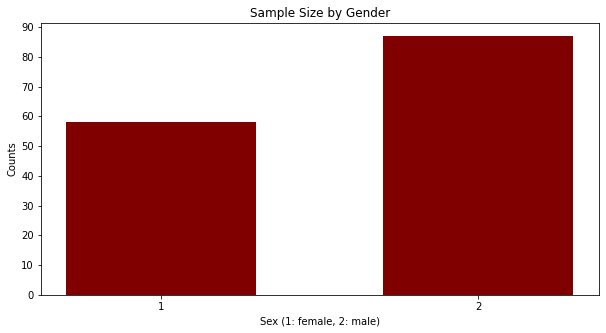

In [34]:
fig = plt.figure(figsize = (10, 5))
plt.title('Sample Size by Gender')
x = PredSP['2'].value_counts().index
y = PredSP['2'].value_counts()
import numpy as np
plt.bar(x, y, color ='maroon', width = 0.6)
plt.xticks(np.arange(1,3))
plt.yticks(np.arange(0,100,10))
plt.xlabel('Sex (1: female, 2: male)')
plt.ylabel('Counts')
plt.savefig("Sample Size by Gender.png")

In [35]:
PredSP['17'].value_counts().sort_index()

1    29
2    74
3    30
4     8
5     4
Name: 17, dtype: int64

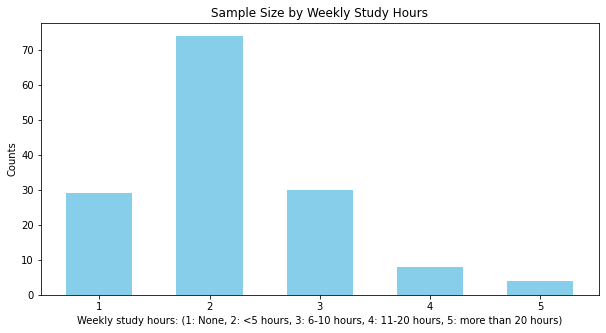

In [36]:
fig = plt.figure(figsize = (10, 5))
plt.title('Sample Size by Weekly Study Hours')
x2 = [1,2,3,4,5]
y2 = [29,74,30,8,4]
import numpy as np
plt.bar(x2, y2, color ='skyblue', width = 0.6)
plt.xlabel('Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)')
plt.ylabel('Counts')
plt.savefig("Sample Size by Weekly Study Hours.png")

In [37]:
PredSP['29'].value_counts().sort_index()

1    17
2    38
3    25
4    40
5    25
Name: 29, dtype: int64

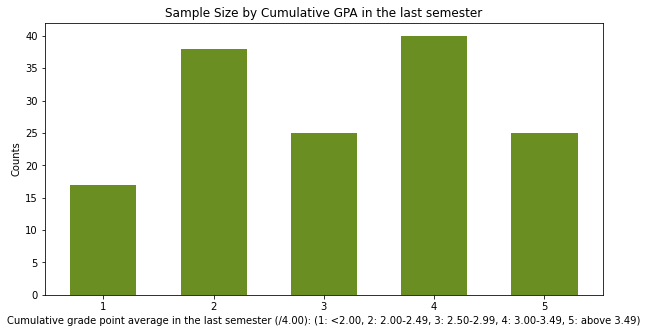

In [38]:
fig = plt.figure(figsize = (10, 5))
plt.title('Sample Size by Cumulative GPA in the last semester')
x3 = [1,2,3,4,5]
y3 = [17,38,25,40,25]
import numpy as np
plt.bar(x3, y3, color ='olivedrab', width = 0.6)
plt.xlabel('Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)')
plt.ylabel('Counts')
plt.savefig("Sample Size by CGPA Last Semester.png")

In [39]:
#I think we do need to exclude the Student ID column out of the model
PredSP2 = PredSP.drop(columns = 'STUDENT ID')

In [40]:
PredSP2

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


##Section 2: Model Training



### Use all the features to create a training set and test set.

In [41]:
PredSP2_y = PredSP2.pop('GRADE')
PredSP2_X = PredSP2

In [42]:
from sklearn.model_selection import train_test_split
p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(
    PredSP2_X, PredSP2_y, test_size=0.3, random_state=200
)

### Implement each model using python libraries (e.g., Scikit-Learn), train the model, and predict the final grade in the test set.


In [43]:
#Model1 - Support Vector Classificationfrom sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import make_pipeline

pipe1 = make_pipeline(StandardScaler(),                    
                      svm.SVC(decision_function_shape='ovo', kernel='linear', C=1,random_state=200))

pipe1.fit(p_X_train, p_y_train)
y1_pred = pipe1.predict(p_X_test)
print('Support Vector Classification Test Accuracy: %.3f' % pipe1.score(p_X_test, p_y_test))

Support Vector Classification Test Accuracy: 0.341


In [44]:
#Model2 - Stochastic Gradient Descent
import numpy as np
np.ceil(10**6 / p_X_test.size) #find the most appropriate max_iter value using the method introduced on Scikit-learn

734.0

In [45]:
from sklearn.linear_model import SGDClassifier
pipe2 = make_pipeline(StandardScaler(),                     
                      SGDClassifier(loss="hinge", penalty="l2", max_iter = 734, random_state=200))

pipe2.fit(p_X_train, p_y_train)
y2_pred = pipe2.predict(p_X_test)
print('Stochastic Gradient Descent Test Accuracy: %.3f' % pipe2.score(p_X_test, p_y_test))

Stochastic Gradient Descent Test Accuracy: 0.295


In [46]:
#Model3 - Decision Trees
from sklearn import tree
pipe3 = make_pipeline(StandardScaler(),                     
                      tree.DecisionTreeClassifier(max_depth=1,
                              random_state=200,
                              criterion='entropy'))

pipe3.fit(p_X_train, p_y_train)
y3_pred = pipe3.predict(p_X_test)
print('Decision Trees Test Accuracy: %.3f' % pipe3.score(p_X_test, p_y_test))

Decision Trees Test Accuracy: 0.318


In [47]:
#Model4 - Random Forest
from sklearn.ensemble import RandomForestClassifier
pipe4 = make_pipeline(StandardScaler(),                     
                      RandomForestClassifier(n_estimators=100, random_state=200))

pipe4.fit(p_X_train, p_y_train)
y4_pred = pipe4.predict(p_X_test)
print('Random Forest Test Accuracy: %.3f' % pipe4.score(p_X_test, p_y_test))

Random Forest Test Accuracy: 0.432


### Build a table comparing the performance of each model.

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=3).split(p_X_train, p_y_train)
scores_SVC = cross_val_score(estimator=pipe1,
                         X=p_X_train,
                         y=p_y_train,
                         cv=kfold,
                         n_jobs=1)
print('SVC CV accuracy scores: %s' % scores_SVC)
print('SVC CV accuracy: %.3f +/- %.3f' % (np.mean(scores_SVC), np.std(scores_SVC)))

SVC CV accuracy scores: [0.26470588 0.26470588 0.27272727]
SVC CV accuracy: 0.267 +/- 0.004


In [49]:
kfold = StratifiedKFold(n_splits=3).split(p_X_train, p_y_train)
scores_SGD = cross_val_score(estimator=pipe2,
                         X=p_X_train,
                         y=p_y_train,
                         cv=kfold,
                         n_jobs=1)
print('SGD CV accuracy scores: %s' % scores_SGD)
print('SGD CV accuracy: %.3f +/- %.3f' % (np.mean(scores_SGD), np.std(scores_SGD)))

SGD CV accuracy scores: [0.14705882 0.23529412 0.18181818]
SGD CV accuracy: 0.188 +/- 0.036


In [50]:
kfold = StratifiedKFold(n_splits=3).split(p_X_train, p_y_train)
scores_DT = cross_val_score(estimator=pipe3,
                         X=p_X_train,
                         y=p_y_train,
                         cv=kfold,
                         n_jobs=1)
print('Decision Trees CV accuracy scores: %s' % scores_DT)
print('Decision Trees CV accuracy: %.3f +/- %.3f' % (np.mean(scores_DT), np.std(scores_DT)))

Decision Trees CV accuracy scores: [0.17647059 0.20588235 0.27272727]
Decision Trees CV accuracy: 0.218 +/- 0.040


In [51]:
kfold = StratifiedKFold(n_splits=3).split(p_X_train, p_y_train)
scores_RF = cross_val_score(estimator=pipe4,
                         X=p_X_train,
                         y=p_y_train,
                         cv=kfold,
                         n_jobs=1)
print('Random Forest CV accuracy scores: %s' % scores_RF)
print('Random Forest CV accuracy: %.3f +/- %.3f' % (np.mean(scores_RF), np.std(scores_RF)))

Random Forest CV accuracy scores: [0.29411765 0.26470588 0.18181818]
Random Forest CV accuracy: 0.247 +/- 0.048


### Explain why you selected one model over another.
The table (for the previous step) and detailed explanation of selection are provided in Part 3 writeup.

### Run Random Forest Importance option to determine the most important features.

In [52]:
PredSP3 = PredSP.drop(columns = 'STUDENT ID')

In [53]:
PredSP3.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')

In [54]:
rf = RandomForestClassifier(n_estimators=100, random_state=200)
pipe_rf = make_pipeline(StandardScaler(),                     
                      rf)

pipe_rf.fit(p_X_train, p_y_train)
y4_pred = pipe_rf.predict(p_X_test)
print('Random Forest Test Accuracy: %.3f' % pipe_rf.score(p_X_test, p_y_test))
#here only to prove that pipe_rf is the same thing as pipe4, since we need rf to determine feature importance

Random Forest Test Accuracy: 0.432


Text(0, 0.5, 'Feature')

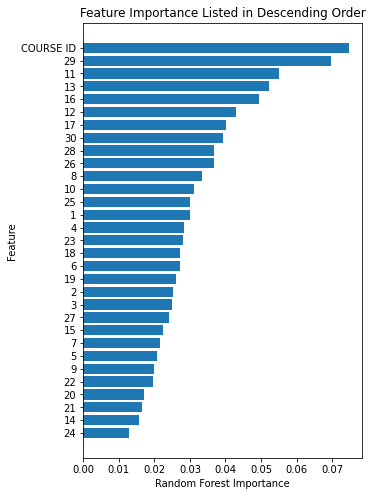

In [55]:
sort = rf.feature_importances_.argsort()
fig = plt.figure(figsize = (5, 8))    
x=PredSP2.columns[sort]
y=rf.feature_importances_[sort]
plt.barh(x,y)
plt.title('Feature Importance Listed in Descending Order')
plt.xlabel('Random Forest Importance')
plt.ylabel('Feature')

In [56]:
rf.feature_importances_[sort]

array([0.01296462, 0.01554006, 0.01663152, 0.01711564, 0.0196791 ,
       0.0199005 , 0.0207689 , 0.02154089, 0.02251466, 0.0241836 ,
       0.02504993, 0.02523531, 0.02605641, 0.02726794, 0.02727179,
       0.02809867, 0.02844107, 0.02992279, 0.02994794, 0.03128072,
       0.0334018 , 0.03664788, 0.03684382, 0.039337  , 0.04024489,
       0.04284865, 0.04950228, 0.05217545, 0.05497402, 0.06982787,
       0.07478429])

In [57]:
# I cross-checked with the detailed descriptions of features and decide to select the more important features for a retrain and retest
# the reason for such a selection will be explained in Part 3 writeup
SP_ImpFea = PredSP[['COURSE ID','29','11','13','16','12','17','30','28','26']]

In [58]:
SP_ImpFea

,COURSE ID,29,11,13,16,12,17,30,28,26
0,1,1,1,3,5,2,3,1,2,2
1,1,2,2,2,1,3,2,3,2,2
2,1,2,2,2,1,2,2,2,1,2
3,1,3,1,5,1,2,3,2,1,2
4,1,2,3,2,4,3,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...
140,9,3,1,2,4,2,3,3,1,1
141,9,5,1,5,1,1,3,3,1,2
142,9,4,3,4,4,4,2,3,1,3
143,9,5,4,1,3,4,2,3,1,1


### Retrain and retest using the reduced feature set, and compare the results. Explain the differences.

In [59]:
N_y = PredSP['GRADE']
N_X = PredSP3

In [60]:
from sklearn.model_selection import train_test_split
N_X_train, N_X_test, N_y_train, N_y_test = train_test_split(
    N_X, N_y, test_size=0.3, random_state=200
)

In [61]:
#Model1 - Support Vector Classification
from sklearn.preprocessing import StandardScaler
pipe1_N = make_pipeline(StandardScaler(),                    
                      svm.SVC(decision_function_shape='ovo', kernel='linear', C=1,random_state=200))

pipe1_N.fit(N_X_train, N_y_train)
y1N_pred = pipe1_N.predict(N_X_test)
print('New Support Vector Classification Test Accuracy: %.3f' % pipe1_N.score(N_X_test, N_y_test))

New Support Vector Classification Test Accuracy: 0.455


In [62]:
#Model2 - Stochastic Gradient Descent
np.ceil(10**6 / N_X_test.size)

711.0

In [63]:
pipe2_N = make_pipeline(StandardScaler(),                     
                      SGDClassifier(loss="hinge", penalty="l2", max_iter = 711, random_state=200))

pipe2_N.fit(N_X_train, N_y_train)
y2N_pred = pipe2_N.predict(N_X_test)
print('New Stochastic Gradient Descent Test Accuracy: %.3f' % pipe2_N.score(N_X_test, N_y_test))

New Stochastic Gradient Descent Test Accuracy: 0.318


In [64]:
#Model3 - Decision Trees
pipe3_N = make_pipeline(StandardScaler(),                     
                      tree.DecisionTreeClassifier(max_depth=1,
                              random_state=200,
                              criterion='entropy'))

pipe3_N.fit(N_X_train, N_y_train)
y3N_pred = pipe3_N.predict(N_X_test)
print('New Decision Trees Test Accuracy: %.3f' % pipe3_N.score(N_X_test, N_y_test))

New Decision Trees Test Accuracy: 0.386


In [65]:
#Model4 - Random Forest
pipe4_N = make_pipeline(StandardScaler(),                     
                      RandomForestClassifier(n_estimators=100, random_state=200))

pipe4_N.fit(N_X_train, N_y_train)
y4N_pred = pipe4_N.predict(N_X_test)
print('Random Forest Test Accuracy: %.3f' % pipe4_N.score(N_X_test, N_y_test))

Random Forest Test Accuracy: 0.636


In [66]:
kfold = StratifiedKFold(n_splits=3).split(N_X_train, N_y_train)
scores_SVC_N = cross_val_score(estimator=pipe1_N,
                         X=N_X_train,
                         y=N_y_train,
                         cv=kfold,
                         n_jobs=1)
print('New SVC CV accuracy scores: %s' % scores_SVC_N)
print('New SVC CV accuracy: %.3f +/- %.3f' % (np.mean(scores_SVC_N), np.std(scores_SVC_N)))

New SVC CV accuracy scores: [0.35294118 0.32352941 0.48484848]
New SVC CV accuracy: 0.387 +/- 0.070


In [67]:
kfold = StratifiedKFold(n_splits=3).split(N_X_train, N_y_train)
scores_SGD_N = cross_val_score(estimator=pipe2_N,
                         X=N_X_train,
                         y=N_y_train,
                         cv=kfold,
                         n_jobs=1)
print('New SGD CV accuracy scores: %s' % scores_SGD_N)
print('New SGD CV accuracy: %.3f +/- %.3f' % (np.mean(scores_SGD_N), np.std(scores_SGD_N)))

New SGD CV accuracy scores: [0.23529412 0.35294118 0.21212121]
New SGD CV accuracy: 0.267 +/- 0.062


In [68]:
kfold = StratifiedKFold(n_splits=3).split(N_X_train, N_y_train)
scores_DT_N = cross_val_score(estimator=pipe3_N,
                         X=N_X_train,
                         y=N_y_train,
                         cv=kfold,
                         n_jobs=1)
print('New Decision Trees CV accuracy scores: %s' % scores_DT_N)
print('New Decision Trees CV accuracy: %.3f +/- %.3f' % (np.mean(scores_DT_N), np.std(scores_DT_N)))

New Decision Trees CV accuracy scores: [0.41176471 0.38235294 0.36363636]
New Decision Trees CV accuracy: 0.386 +/- 0.020


In [69]:
kfold = StratifiedKFold(n_splits=3).split(N_X_train, N_y_train)
scores_RF_N = cross_val_score(estimator=pipe4_N,
                         X=N_X_train,
                         y=N_y_train,
                         cv=kfold,
                         n_jobs=1)
print('New Random Forest CV accuracy scores: %s' % scores_RF_N)
print('New Random Forest CV accuracy: %.3f +/- %.3f' % (np.mean(scores_RF_N), np.std(scores_RF_N)))

New Random Forest CV accuracy scores: [0.55882353 0.70588235 0.81818182]
New Random Forest CV accuracy: 0.694 +/- 0.106


It is very obvious that, from our new selection of more important features, the accuracies of all four models (whether before or after the application of k-fold CV) have increased. Retaining the same methods, we are able to conclude that the choices of which features to select made the difference.